# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [1]:
# ============================================
# IMPORTACIÓN DE LIBRERÍAS NECESARIAS
# ============================================

# import tensorflow as tf  # TensorFlow es el framework base
from tensorflow import keras  # Keras es la API de alto nivel de TensorFlow
from tensorflow.keras import layers  # Módulo de capas para construir redes neuronales

import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas y manejo de arrays

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [2]:
# ============================================
# CARGA DEL DATASET MNIST
# ============================================
# MNIST es un dataset clásico de dígitos escritos a mano (0-9)
# Cada imagen es de 28x28 píxeles en escala de grises

# Keras incluye datasets populares que podemos cargar directamente
# load_data() retorna 4 arrays: X_train, y_train, X_test, y_test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [3]:
# ============================================
# EXPLORACIÓN DE LAS DIMENSIONES DEL DATASET
# ============================================
'''
Resultado esperado:
- X_train: 60.000 imágenes de 28x28 píxeles (conjunto de entrenamiento)
- y_train: 60.000 etiquetas (los números del 0 al 9)
- X_test: 10.000 imágenes de prueba
- y_test: 10.000 etiquetas de prueba
'''

# Shape de los datos de entrenamiento
print(X_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

# Shape de los datos de prueba
print(X_test.shape)   # (10000, 28, 28)
print(y_test.shape)   # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

C:\Users\borja\AppData\Local\Temp\ipykernel_27664\1360854288.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


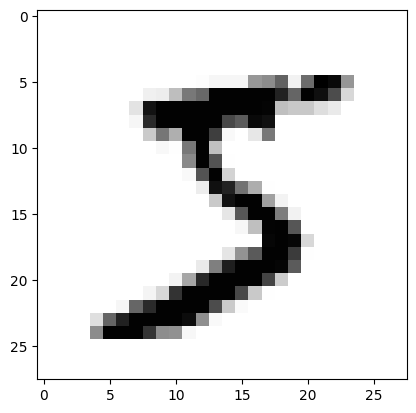

In [4]:
# ============================================
# VISUALIZACIÓN DE UNA IMAGEN DEL DATASET
# ============================================
import matplotlib.pyplot as plt

# Mostramos la primera imagen del conjunto de entrenamiento
# cmap='Greys' muestra la imagen en escala de grises
plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel 

0 representa negro absoluto.

255 representa blanco absoluto.

¿Se te ocurre alguna manera de normalizar los datos?

In [5]:
# ============================================
# NORMALIZACIÓN DE LOS DATOS (FEATURE SCALING)
# ============================================
# Los valores de los píxeles van de 0 a 255
# Dividimos entre 255 para normalizar los valores entre 0 y 1
# Esto ayuda a que la red neuronal aprenda más rápido y mejor

# Convertimos a float32 para mayor precisión y dividimos por 255
X_train = X_train.astype("float32") / 255  # Normalización del conjunto de entrenamiento
X_test = X_test.astype("float32") / 255    # Normalización del conjunto de prueba

In [6]:
# ============================================
# VERIFICACIÓN DE LA NORMALIZACIÓN
# ============================================
# Comprobamos que ahora los valores están entre 0 y 1
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
# ============================================
# CONVERSIÓN DE ETIQUETAS A FLOAT32
# ============================================
# Convertimos las etiquetas (y) a float32 por consistencia
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [8]:
# ============================================
# CREACIÓN DEL CONJUNTO DE VALIDACIÓN
# ============================================
# Separamos 10.000 muestras del conjunto de entrenamiento para validación
# La validación se usa durante el entrenamiento para evaluar el modelo
# en cada epoch y detectar overfitting

# Últimas 10.000 muestras para validación
X_val = X_train[-10000:]
y_val = y_train[-10000:]

# Las primeras 50.000 muestras quedan para entrenamiento
X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [9]:
# ============================================
# VERIFICACIÓN DE LAS DIMENSIONES FINALES
# ============================================
print(X_train.shape)  # (50000, 28, 28) - Entrenamiento
print(X_val.shape)    # (10000, 28, 28) - Validación
print(X_test.shape)   # (10000, 28, 28) - Prueba

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [10]:
# ============================================
# CONSTRUCCIÓN DE LA ARQUITECTURA DE LA RED NEURONAL
# ============================================
# Vamos a crear una red neuronal secuencial (capa por capa)

# Inicializamos el modelo secuencial
model = keras.models.Sequential()

# CAPA DE ENTRADA (Flatten)
# Convierte la matriz 2D (28x28) en un vector 1D de 784 elementos
# Esto es necesario porque las capas Dense requieren entrada 1D
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# PRIMERA CAPA OCULTA (Hidden Layer 1)
# 300 neuronas con función de activación ReLU
# ReLU (Rectified Linear Unit): f(x) = max(0, x)
# Es rápida de calcular y evita el problema de gradientes que desaparecen
model.add(keras.layers.Dense(units=300,
                              activation='relu'))

# SEGUNDA CAPA OCULTA (Hidden Layer 2)
# 100 neuronas con función de activación ReLU
# Al tener menos neuronas, va reduciendo la dimensionalidad
model.add(keras.layers.Dense(units=100,
                              activation='relu'))

# CAPA DE SALIDA (Output Layer)
# 10 neuronas (una por cada dígito del 0 al 9)
# Softmax: convierte los valores en probabilidades que suman 1
# Ideal para problemas de clasificación multiclase
model.add(keras.layers.Dense(units=10,
                              activation='softmax'))

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# ============================================
# FORMA ALTERNATIVA DE DECLARAR LA RED NEURONAL
# ============================================
# Esta forma es más compacta y legible cuando tenemos muchas capas

# Definimos todas las capas en una lista
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),  # Capa de entrada
    keras.layers.Dense(units=300, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(units=100, activation='relu'),  # Hidden layer 2
    keras.layers.Dense(units=10, activation='softmax')  # Capa de salida
]

# Creamos el modelo pasando la lista de capas directamente
model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [12]:
# ============================================
# INSPECCIÓN DE LAS CAPAS DEL MODELO
# ============================================
# Podemos acceder a cada capa individualmente usando índices
print(model.layers[0])  # Primera capa (Flatten)

<Flatten name=flatten_1, built=True>


Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [13]:
# ============================================
# VISUALIZACIÓN DE PESOS Y SESGOS INICIALES
# ============================================
# Keras inicializa los pesos aleatoriamente y los sesgos (bias) en 0
# Esto ocurre antes del entrenamiento

# Accedemos a la primera capa oculta (índice 1)
hidden1 = model.layers[1]

# get_weights() retorna una tupla: (weights, biases)
weights, biases = hidden1.get_weights()

In [14]:
# Visualizamos la matriz de pesos (valores aleatorios iniciales)
weights

array([[-0.01131446,  0.03214083,  0.02625445, ...,  0.01113001,
         0.05868475, -0.07246196],
       [-0.06270335, -0.0494878 , -0.04371113, ...,  0.06257014,
        -0.04753117, -0.06525592],
       [-0.00640301,  0.0284531 , -0.05991141, ..., -0.00096421,
        -0.0482851 , -0.07241929],
       ...,
       [ 0.05809818, -0.03942509, -0.01202272, ..., -0.05949966,
        -0.07271319, -0.06703442],
       [ 0.05766064, -0.04801146,  0.04844613, ...,  0.03699864,
        -0.04538583,  0.0589208 ],
       [-0.01884619,  0.03224362,  0.01797148, ...,  0.01384272,
         0.06716406, -0.06738105]], shape=(784, 300), dtype=float32)

In [15]:
# Número total de pesos en esta capa
# Debería ser: 784 (entradas) × 300 (neuronas) = 235,200
weights.size

235200

Establecemos la configuración de ejecución... el compile.

In [16]:
# ============================================
# COMPILACIÓN DEL MODELO (FORMA DETALLADA)
# ============================================
# La compilación configura el proceso de aprendizaje del modelo

model.compile(
    # OPTIMIZADOR: SGD (Stochastic Gradient Descent)
    # Actualiza los pesos usando el gradiente descendente estocástico
    optimizer=keras.optimizers.SGD(),
    
    # FUNCIÓN DE PÉRDIDA: Sparse Categorical Crossentropy
    # Mide el error entre las predicciones y las etiquetas reales
    # "Sparse" porque las etiquetas son enteros (0-9), no one-hot encoded
    loss=keras.losses.SparseCategoricalCrossentropy(),
    
    # MÉTRICA: Accuracy (precisión)
    # Porcentaje de predicciones correctas durante el entrenamiento
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [17]:
# ============================================
# COMPILACIÓN DEL MODELO (FORMA SIMPLIFICADA)
# ============================================
# Equivalente al anterior pero usando nombres de string
# Esta forma es más corta y comúnmente usada

model.compile(
    optimizer="sgd",  # Optimizador SGD
    loss="sparse_categorical_crossentropy",  # Función de pérdida
    metrics=["accuracy"]  # Métrica de evaluación
)

In [18]:
# ============================================
# RESUMEN DEL MODELO
# ============================================
# Muestra la arquitectura completa: capas, shapes y parámetros
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [19]:
# Verificamos el shape de los datos de entrenamiento
X_train.shape  # (50000, 28, 28)

(50000, 28, 28)

In [20]:
# ============================================
# ENTRENAMIENTO DEL MODELO
# ============================================
# Aquí es donde la red neuronal "aprende" ajustando sus pesos

history = model.fit(
    X_train,  # Datos de entrada (imágenes)
    y_train,  # Etiquetas (targets)
    
    # BATCH_SIZE: número de muestras procesadas antes de actualizar pesos
    # Un batch más pequeño = más actualizaciones pero más lento
    batch_size=128,
    
    # EPOCHS: número de veces que el modelo ve todo el dataset
    # Más epochs = más aprendizaje, pero riesgo de overfitting
    epochs=50,
    
    # VALIDATION_DATA: datos para evaluar el modelo en cada epoch
    # Permite monitorear si hay overfitting (loss de validación aumenta)
    validation_data=(X_val, y_val)  # Alternativa: validation_split=0.1
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6787 - loss: 1.2898 - val_accuracy: 0.8579 - val_loss: 0.6085
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 0.5193 - val_accuracy: 0.8974 - val_loss: 0.3935
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8916 - loss: 0.3967 - val_accuracy: 0.9085 - val_loss: 0.3318
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9027 - loss: 0.3465 - val_accuracy: 0.9167 - val_loss: 0.3021
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9106 - loss: 0.3161 - val_accuracy: 0.9238 - val_loss: 0.2781
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2939 - val_accuracy: 0.9275 - val_loss: 0.2630
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9222 - loss: 0.2763 - val_accuracy: 0.9294 - val_loss: 0.2496
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9256 - loss: 0.2616 - val_accuracy: 0.


## Batch size

En entrenamiento de modelos (machine learning / deep learning), el **batch size** es:

> **La cantidad de muestras (datos) que se procesan juntas en una sola pasada antes de actualizar los pesos del modelo.**

Ejemplos:

- **batch size = 1** → el modelo procesa **1 muestra a la vez**
- **batch size = 32** → procesa **32 muestras a la vez**
- **batch size = 128** → procesa **128 muestras a la vez**

**Impacto del batch size:**

- **Velocidad:** batches grandes suelen aprovechar mejor la GPU → entrenamiento más rápido.
- **Ruido en el gradiente:**  
  - batch pequeño → más ruido, más variabilidad en las actualizaciones.  
  - batch grande → actualizaciones más estables.
- **Memoria:** batch más grande → mayor consumo de RAM/VRAM.

---

## Época (epoch) y su relación con el batch size

### ¿Qué es un epoch?

Un **epoch** es:

> **Una pasada completa por todo el dataset de entrenamiento.**

Es decir, el modelo ve **todas** las muestras del conjunto de datos **una vez**.

---

### ¿Cómo se relacionan epoch y batch size?

El **batch size** define cuántas muestras se procesan a la vez dentro de un epoch, por lo que:

> Un **epoch se divide en varios batches**.

Si:

- **N** = número total de muestras del dataset  
- **B** = batch size  

Entonces:

\[
\text{Número de batches por epoch} = \frac{N}{B}
\]

(normalmente se redondea hacia arriba si N no es múltiplo de B).

---

### Ejemplo práctico

Supón que tienes:

- Dataset con **N = 10 000** imágenes  
- **batch size = 100**

Entonces:

\[
\text{batches por epoch} = \frac{10 000}{100} = 100
\]

Eso significa que:

- En **cada epoch**, el modelo hará **100 actualizaciones de pesos** (una por batch).

---

### Efecto de cambiar el batch size

| Batch size | Batches por epoch (con N = 10 000) | Comentario                                  |
|-----------:|------------------------------------:|---------------------------------------------|
| 50         | 200                                | Más actualizaciones, más detalle, más lento |
| 100        | 100                                | Equilibrado                                 |
| 500        | 20                                 | Menos actualizaciones, más rápido           |

---

## Resumen rápido

- **Escala de grises:**
  - 0 = negro, 255 = blanco, intermedios = grises.
- **Batch size:**
  - Cantidad de muestras que pasan **de una vez** por el modelo antes de actualizar los pesos.
- **Epoch:**
  - Una pasada completa por todo el dataset.
- **Relación:**
  - Un epoch se divide en varios batches.
  - \(\text{batches por epoch} = \frac{N}{B}\).



Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [35]:
# ============================================
# REENTRENAMIENTO DEL MODELO
# ============================================
# Podemos seguir entrenando un modelo ya entrenado
# NO empieza desde cero, continúa desde donde se quedó
# Útil para hacer ajustes finos (fine-tuning)

rentre = model.fit(
    X_train,
    y_train,
    batch_size=64,  # Probamos con un batch diferente
    epochs=10,  # Solo 10 epochs adicionales
    validation_data=(X_val, y_val)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9849 - loss: 0.0569 - val_accuracy: 0.9741 - val_loss: 0.0922
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9858 - loss: 0.0549 - val_accuracy: 0.9736 - val_loss: 0.0942
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9864 - loss: 0.0532 - val_accuracy: 0.9751 - val_loss: 0.0884
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9869 - loss: 0.0514 - val_accuracy: 0.9710 - val_loss: 0.0988
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9875 - loss: 0.0499 - val_accuracy: 0.9762 - val_loss: 0.0873
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9879 - loss: 0.0483 - val_accuracy: 0.9765 - val_loss: 0.0862
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9881 - loss: 0.0468 - val_accuracy: 0.9757 - val_loss: 0.0865
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9887 - loss: 0.0453 - val_accuracy: 0.

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [40]:
# ============================================
# EXPLORACIÓN DEL HISTÓRICO DE ENTRENAMIENTO
# ============================================
# El objeto history contiene métricas de cada epoch
print(history.params)  # Parámetros del entrenamiento
print(history.epoch)   # Número de epochs ejecutadas
print(history.history)  # Diccionario con loss, accuracy, val_loss, val_accuracy

{'verbose': 'auto', 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
{'accuracy': [0.678659975528717, 0.8679800033569336, 0.8916400074958801, 0.9027199745178223, 0.9105799794197083, 0.9167799949645996, 0.9222000241279602, 0.9255599975585938, 0.9293400049209595, 0.9328799843788147, 0.9359999895095825, 0.9381200075149536, 0.9400799870491028, 0.9427400231361389, 0.9449800252914429, 0.9465799927711487, 0.9480800032615662, 0.9503800272941589, 0.9517199993133545, 0.9531400203704834, 0.9545800089836121, 0.9559000134468079, 0.9570599794387817, 0.9580199718475342, 0.9596800208091736, 0.960640013217926, 0.9616199731826782, 0.9623799920082092, 0.9636200070381165, 0.9643800258636475, 0.9654399752616882, 0.9665399789810181, 0.9675400257110596, 0.9680200219154358, 0.9694399833679199, 0.9698399901390076, 0.970740020275116, 0.97111999

In [32]:
# Visualizamos el diccionario completo del histórico
history.history

{'accuracy': [0.678659975528717,
  0.8679800033569336,
  0.8916400074958801,
  0.9027199745178223,
  0.9105799794197083,
  0.9167799949645996,
  0.9222000241279602,
  0.9255599975585938,
  0.9293400049209595,
  0.9328799843788147,
  0.9359999895095825,
  0.9381200075149536,
  0.9400799870491028,
  0.9427400231361389,
  0.9449800252914429,
  0.9465799927711487,
  0.9480800032615662,
  0.9503800272941589,
  0.9517199993133545,
  0.9531400203704834,
  0.9545800089836121,
  0.9559000134468079,
  0.9570599794387817,
  0.9580199718475342,
  0.9596800208091736,
  0.960640013217926,
  0.9616199731826782,
  0.9623799920082092,
  0.9636200070381165,
  0.9643800258636475,
  0.9654399752616882,
  0.9665399789810181,
  0.9675400257110596,
  0.9680200219154358,
  0.9694399833679199,
  0.9698399901390076,
  0.970740020275116,
  0.9711199998855591,
  0.9721599817276001,
  0.9721999764442444,
  0.9732800126075745,
  0.9736800193786621,
  0.97434002161026,
  0.9750000238418579,
  0.9755399823188782,
  0

In [33]:
# Vemos las métricas disponibles en el histórico
history.history.keys()  # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
# Convertimos el histórico a DataFrame para visualizarlo mejor
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.67866,1.289835,0.8579,0.608532
1,0.86798,0.519317,0.8974,0.393457
2,0.89164,0.396699,0.9085,0.331768
3,0.90272,0.346479,0.9167,0.302088
4,0.91058,0.316065,0.9238,0.278068
5,0.91678,0.293945,0.9275,0.262981
6,0.92220,0.276301,0.9294,0.249632
7,0.92556,0.261649,0.9330,0.238684
8,0.92934,0.248843,0.9376,0.228259
9,0.93288,0.237449,0.9404,0.218730


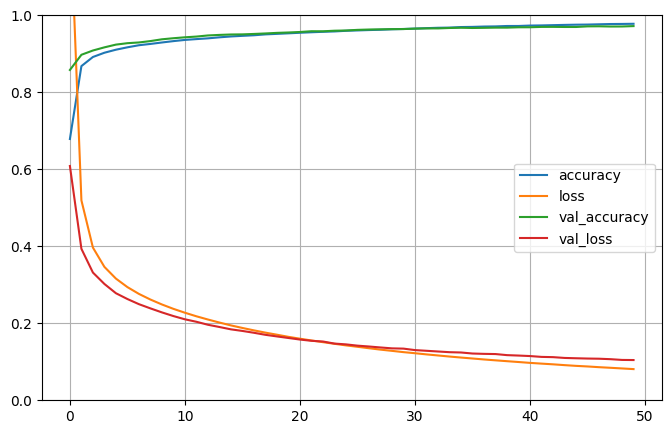

In [41]:
# ============================================
# VISUALIZACIÓN DEL PROCESO DE ENTRENAMIENTO
# ============================================
import pandas as pd
import matplotlib.pyplot as plt

# Graficamos todas las métricas (loss, accuracy, val_loss, val_accuracy)
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Configuramos la gráfica
plt.grid(True)  # Añadimos cuadrícula
plt.gca().set_ylim(0, 1)  # Rango vertical de 0 a 1

# Interpretación:
# - Si val_loss aumenta mientras loss disminuye = OVERFITTING
# - Si ambas disminuyen = el modelo está aprendiendo bien
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [42]:
# ============================================
# EVALUACIÓN DEL MODELO CON DATOS DE PRUEBA
# ============================================
# Evaluamos el modelo con datos que NUNCA ha visto durante el entrenamiento
# Esto nos da una idea del rendimiento real del modelo

# evaluate() retorna [loss, accuracy]
results = model.evaluate(X_test, y_test)
results  # [pérdida en test, accuracy en test]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9753 - loss: 0.0803


[0.08032266050577164, 0.9753000140190125]

C:\Users\borja\AppData\Local\Temp\ipykernel_27664\3012439489.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[0].reshape(28, 28), cmap=plt.cm.get_cmap('Greys'));


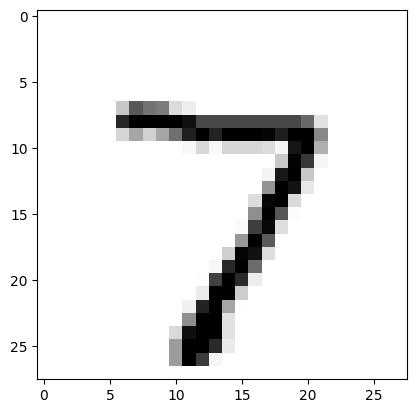

In [43]:
# ============================================
# VISUALIZACIÓN DE UN EJEMPLO DE PRUEBA
# ============================================
# Mostramos la primera imagen del conjunto de prueba
plt.imshow(X_test[0].reshape(28, 28), cmap=plt.cm.get_cmap('Greys'));

In [44]:
# Vemos los datos crudos de la primera imagen
X_test[:1]  # Array con valores normalizados entre 0 y 1

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [45]:
# ============================================
# PREDICCIONES DEL MODELO
# ============================================
# Hacemos una predicción con la primera imagen del test

predictions = model.predict(X_test[:1])

# Shape de las predicciones: (1, 10)
# 1 muestra, 10 probabilidades (una por cada dígito 0-9)
print(predictions.shape)

# Redondeamos a 3 decimales para ver las probabilidades
# La suma de todas las probabilidades debe ser 1 (gracias a softmax)
np.round(predictions, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ]], dtype=float32)

In [46]:
# ============================================
# OBTENER LA CLASE PREDICHA
# ============================================
# argmax() retorna el índice del valor más alto
# Es decir, el dígito con mayor probabilidad
predictions.argmax()  # Dígito predicho (0-9)

np.int64(7)

In [47]:
# ============================================
# PREDICCIONES PARA TODO EL CONJUNTO DE PRUEBA
# ============================================
# Obtenemos las predicciones para todas las imágenes del test
# axis=1 indica que argmax se aplica a cada fila (cada predicción)
model.predict(X_test).argmax(axis=1)  # Array con todos los dígitos predichos

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

C:\Users\borja\AppData\Local\Temp\ipykernel_27664\3701829453.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[1].reshape(28, 28), cmap=plt.cm.get_cmap('Greys'));


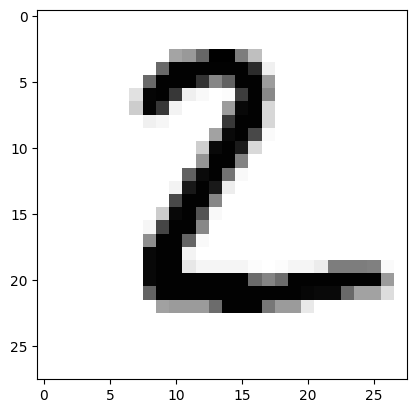

In [51]:
# Visualizamos la segunda imagen del test
plt.imshow(X_test[1].reshape(28, 28), cmap=plt.cm.get_cmap('Greys'));

In [52]:
# ============================================
# MATRIZ DE CONFUSIÓN
# ============================================
# Muestra los errores del modelo: qué dígitos confunde con cuáles
from sklearn.metrics import confusion_matrix, classification_report

# Filas = etiquetas reales, Columnas = predicciones
# Diagonal = predicciones correctas
confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


array([[ 966,    0,    1,    1,    1,    3,    3,    1,    3,    1],
       [   0, 1119,    3,    0,    0,    2,    3,    0,    8,    0],
       [   3,    1, 1010,    4,    2,    0,    2,    5,    5,    0],
       [   0,    0,    3,  991,    0,    5,    0,    3,    5,    3],
       [   1,    0,    5,    1,  950,    1,    3,    3,    2,   16],
       [   6,    0,    0,    7,    0,  866,    7,    1,    4,    1],
       [   4,    2,    0,    0,    3,    6,  938,    0,    5,    0],
       [   1,    7,   10,    3,    0,    0,    0,  995,    1,   11],
       [   5,    0,    3,    5,    3,    5,    5,    4,  941,    3],
       [   3,    4,    1,    8,    8,    1,    1,    3,    3,  977]])

In [53]:
# ============================================
# REPORTE DE CLASIFICACIÓN
# ============================================
# Muestra precision, recall, f1-score para cada clase (dígito)
# También incluye accuracy global y promedios macro/weighted
print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.97      0.98      0.98      1032
         3.0       0.97      0.98      0.98      1010
         4.0       0.98      0.97      0.97       982
         5.0       0.97      0.97      0.97       892
         6.0       0.98      0.98      0.98       958
         7.0       0.98      0.97      0.97      1028
         8.0       0.96      0.97      0.96       974
         9.0       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [54]:
# ============================================
# CARGA DEL DATASET CALIFORNIA HOUSING
# ============================================
# Dataset de regresión: predecir precios de casas en California
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargamos el dataset
housing = fetch_california_housing()

# Convertimos a DataFrame para visualizar mejor
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing['target']  # Añadimos la columna objetivo (precio)

df.head()  # Primeras 5 filas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [55]:
# ============================================
# DIVISIÓN Y NORMALIZACIÓN DE DATOS
# ============================================

# PRIMERA DIVISIÓN: Train completo (75%) y Test (25%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data,
    housing.target
)

# SEGUNDA DIVISIÓN: Train (75% de 75%) y Validation (25% de 75%)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full
)

# ESTANDARIZACIÓN (StandardScaler)
# Transforma los datos para tener media=0 y desviación estándar=1
# IMPORTANTE: fit_transform solo en train, transform en valid/test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Aprende y transforma
X_valid = scaler.transform(X_valid)      # Solo transforma
X_test = scaler.transform(X_test)        # Solo transforma

In [56]:
# Verificamos el shape de los datos de entrenamiento
# Debería mostrar (num_muestras, 8) porque hay 8 características
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [ ]:
# ============================================
# MODELO DE REGRESIÓN CON KERAS
# ============================================

# Creamos una red neuronal simple para regresión
model = keras.models.Sequential([
    # CAPA OCULTA
    # 30 neuronas con activación ReLU
    # input_shape=[8] porque tenemos 8 características
    # X_train.shape[1:] es otra forma de especificar las dimensiones
    keras.layers.Dense(30, activation='relu',
                       input_shape=[8]),
    
    # CAPA DE SALIDA
    # 1 neurona SIN función de activación (regresión lineal)
    # Predice un valor continuo (precio de la casa)
    keras.layers.Dense(1)
])

# COMPILACIÓN
# loss='mean_squared_error': función de pérdida para regresión
# Mide la distancia cuadrática entre predicción y valor real
model.compile(loss="mean_squared_error",
              optimizer="sgd")

# ENTRENAMIENTO
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 51s 142ms/step - loss: 7.3833

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8396 - val_loss: 2.1843
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6055 - val_loss: 0.4388
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4615 - val_loss: 0.4188
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4421 - val_loss: 0.3930
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4299 - val_loss: 0.3879
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4208 - val_loss: 0.3852
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4173 - val_loss: 0.3743
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4076 - val_loss: 0.3700
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4030 - val_loss: 0.3706
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4001 - val_loss: 0.3656
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3998 - val_loss: 0.3612
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

In [58]:
# ============================================
# RESUMEN DEL MODELO DE REGRESIÓN
# ============================================
model.summary()
# Total params = (8 inputs × 30 neurons) + 30 bias + (30 × 1) + 1 bias = 271

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [59]:
# ============================================
# EVALUACIÓN DEL MODELO DE REGRESIÓN
# ============================================
# Calculamos el MSE (Mean Squared Error) en el conjunto de test
mse_test = model.evaluate(X_test, y_test)
print(mse_test)  # Cuanto menor sea el MSE, mejor

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.3652
0.3651953935623169


In [60]:
# ============================================
# PREDICCIONES DEL MODELO DE REGRESIÓN
# ============================================
# Predecimos los precios de las primeras 5 casas del test
y_pred = model.predict(X_test[:5])
y_pred  # Array con los precios predichos (valores continuos)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.94108367],
       [2.6742039 ],
       [1.6785305 ],
       [0.81581604],
       [2.8915496 ]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [61]:
# ============================================
# GUARDAR EL MODELO
# ============================================
# Guardamos el modelo completo (arquitectura + pesos + configuración)
# Formato .keras es el recomendado (antes se usaba .h5)
model.save("my_keras_model.keras")
model.save("my_keras_model.h5")

In [62]:
# ============================================
# CARGAR UN MODELO GUARDADO
# ============================================
# Cargamos el modelo completo desde el archivo
# Podemos usar este modelo directamente para predicciones
model = keras.models.load_model("my_keras_model.keras")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [63]:
# ============================================
# CALLBACK: MODEL CHECKPOINT
# ============================================
# Guarda el modelo automáticamente después de cada epoch
# Útil para no perder progreso si se interrumpe el entrenamiento

checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")

# El modelo se guardará en "callback_model.h5" tras cada epoch
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    callbacks=[checkpoint_cb])

Epoch 1/30
332/363 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.3927

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.3776
Epoch 2/30
324/363 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.3688

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.3740
Epoch 3/30
306/363 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.3813

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.3744
Epoch 4/30
311/363 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.3813

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.3737
Epoch 5/30
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3626

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3717
Epoch 6/30
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.3847

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.3719
Epoch 7/30
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.3681

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.3678
Epoch 8/30
302/363 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.3744

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.3777
Epoch 9/30
320/363 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.3800

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.3699
Epoch 10/30
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.3582

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.3639
Epoch 11/30
321/363 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.3957

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.3639
Epoch 12/30
314/363 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.3822

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.3580
Epoch 13/30
299/363 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.3436

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.3612
Epoch 14/30
312/363 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.3596

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.3570
Epoch 15/30
315/363 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.3574

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.3581
Epoch 16/30
316/363 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.3510

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.3535
Epoch 17/30
306/363 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.3433

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - loss: 0.3542
Epoch 18/30
321/363 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.3399

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.3485
Epoch 19/30
323/363 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.3340

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.3473
Epoch 20/30
302/363 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.3505

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.3460
Epoch 21/30
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.3482

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.3443
Epoch 22/30
342/363 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.3834

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.3697
Epoch 23/30
303/363 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.3398

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.3417
Epoch 24/30
304/363 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.3499

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.3409
Epoch 25/30
336/363 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.3342

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3411  
Epoch 26/30
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.3381

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.3386
Epoch 27/30
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.3205

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.3390
Epoch 28/30
306/363 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.3430

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.3406
Epoch 29/30
318/363 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.3280

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.3351
Epoch 30/30
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.3253

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.3385


### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [ ]:
# ============================================
# CALLBACK: EARLY STOPPING
# ============================================
# Detiene el entrenamiento automáticamente cuando no hay mejora
# Previene overfitting y ahorra tiempo de entrenamiento

# patience=3: espera 3 epochs sin mejora antes de detener
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3)

# Podemos combinar múltiples callbacks en una lista
history = model.fit(X_train,
                    y_train,
                    epochs=50,  # Máximo 50 epochs
                    validation_data=(X_valid, y_valid),
                    # Se detendrá antes si val_loss no mejora durante 3 epochs
                    callbacks=[early_stopping_cb, checkpoint_cb])